<a href="https://colab.research.google.com/github/SoniaPMi/Master-IA/blob/main/Hunger_games_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

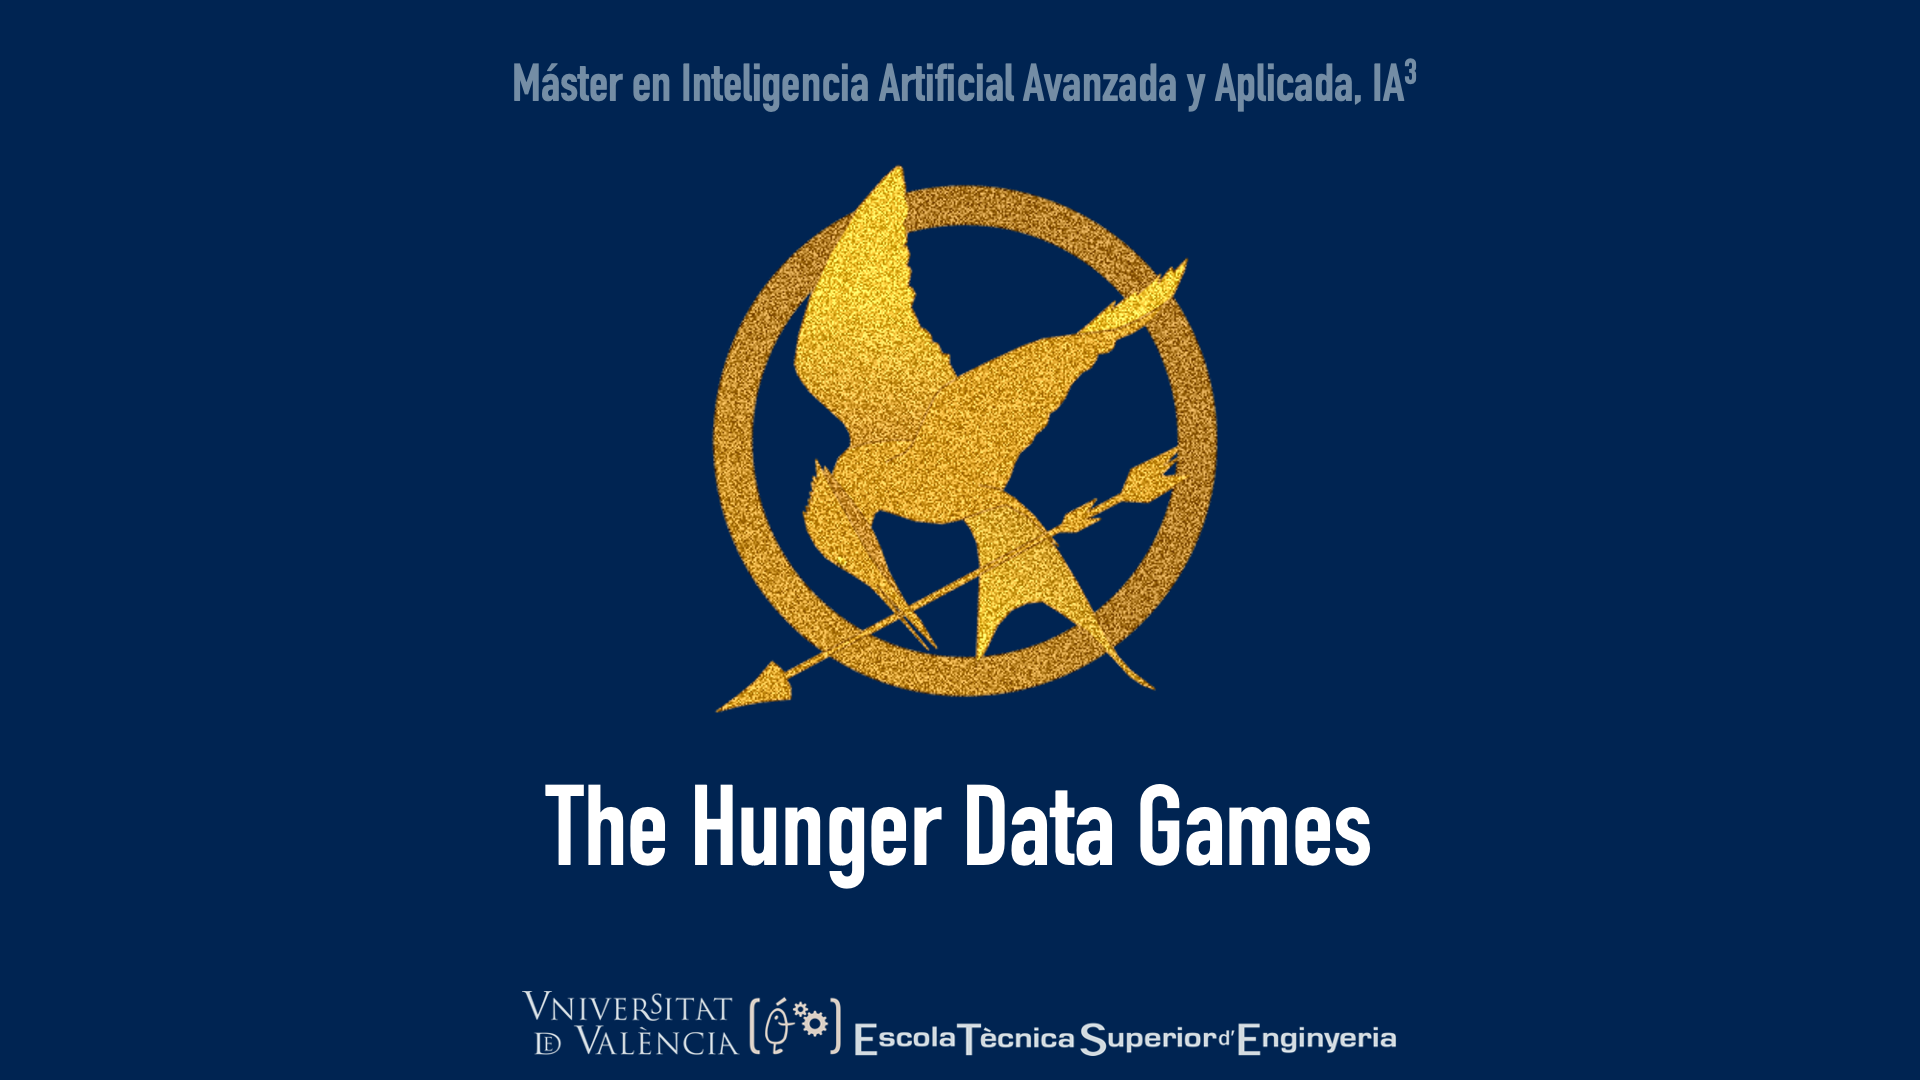

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/CuadraAlconero/IDAL_IA3_CuadraAlconero/main/glass.csv"
dataframe = pd.read_csv(url, header=0)
dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

The target variable is type_of_glass

In [ ]:
dataframe.head(10)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


A few recommendations for you to solve the exercise. Remember the different types of algorithm that we have studied and follow a natural path in building the exercise. Commence using a single estimator and try to build a bagging estimator.

For the evaluation metric check this webpage:

https://scikit-learn.org/stable/modules/model_evaluation.html

Specially check those called balanced_accuracy and f1_micro.

Finally the submission of the exercise must be a model file with the name of your team (find one which is cool I will add the coolness of the name to the final grade). 

Check this webpage for saving the model: https://scikit-learn.org/stable/modules/model_persistence.html

One more thing I will evaluate using the np.random.seed(123) use it for training your model.

In case that a preprocessing of data is performed include a class in the notebook which transforms the original input to your desired one.

> ## ANÁLISIS DE LOS DATOS.

>Comprobamos valores nulos

In [ ]:
dataframe.isna().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [ ]:

dataframe.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


>Eliminamos muestras repetidas y vemos un resumen de los datos que tenemos

In [ ]:
dataframe = dataframe.drop_duplicates()
dataframe.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
dataframe.groupby("type_of_glass").mean()
# %_elemento en cada tipo:

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
type_of_glass,,,,,,,,,
1,1.518669,13.228261,3.548551,1.173913,72.631449,0.452319,8.786087,0.012899,0.057826
2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


In [ ]:
dataframe.groupby("type_of_glass").count()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
type_of_glass,,,,,,,,,
1,69,69,69,69,69,69,69,69,69
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


>Vemos que cada característica presenta un rango de valores diferentes, estan en diferentes escalas de rango. Deperemos "escalar" los datos.

>Vamos a observar que disrtubición presentan, para determinar que método aplicar.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


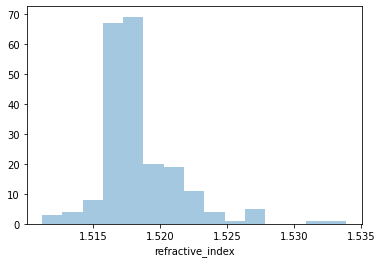

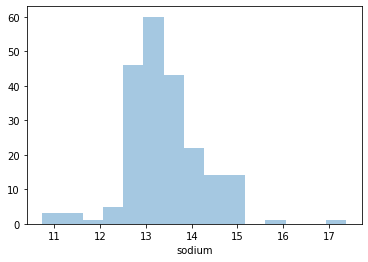

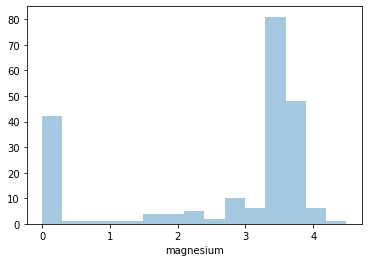

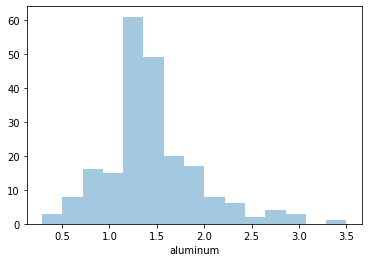

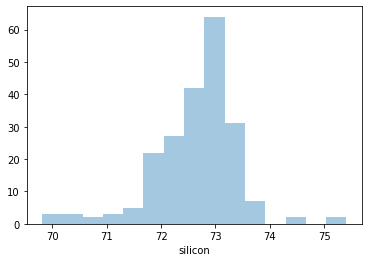

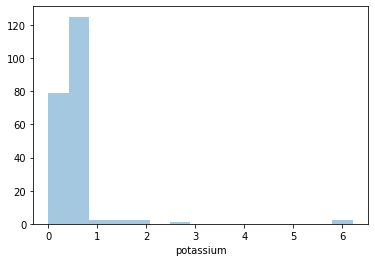

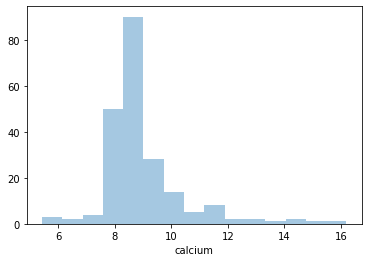

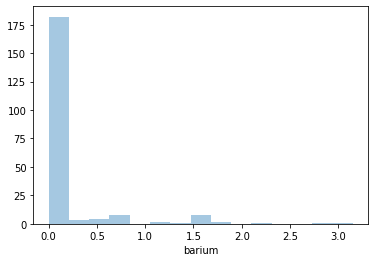

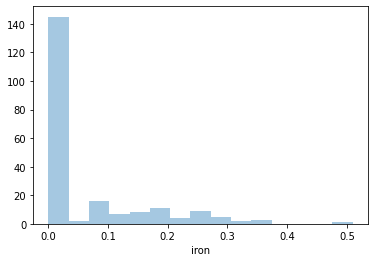

In [ ]:
features = dataframe.iloc[:,:-1]

for i in features:
    skew = features[i].skew()
    sns.distplot(features[i], kde= False, bins=15) #si  no le pongo kde false me da un warning
    
    plt.show()

> Dado que no todas las características parecen llevar una distribución normal y hemos observado que los rangos de cada elemento son muy diferentes, por lo que tendrán varianzas muy diferentes, aplicaremos estandarización a las "fearures" de nuestro modelo.

>Estudiamos si tenemos características correlacionadas:

In [ ]:
corr = features.corr()


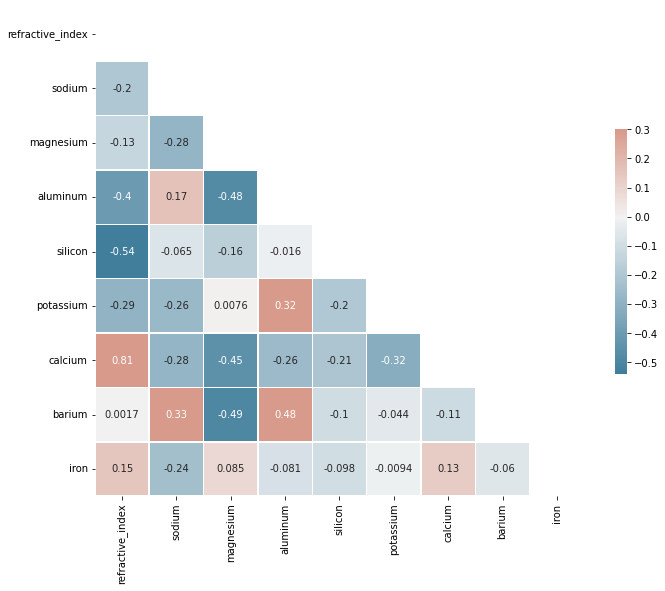

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


Parece que "calcium" y "refratitive_index" estan fuertemente relacionadas.

In [ ]:
dataframe[['calcium','refractive_index']]

,calcium,refractive_index
0,8.75,1.52101
1,7.83,1.51761
2,7.78,1.51618
3,8.22,1.51766
4,8.07,1.51742
...,...,...
209,9.18,1.51623
210,8.40,1.51685
211,8.44,1.52065
212,8.48,1.51651


>Vamos a analizar el Target.

In [ ]:
dataframe['type_of_glass'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: type_of_glass, dtype: int64

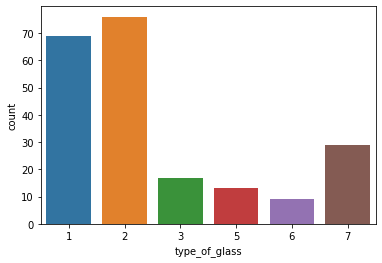

In [ ]:
import seaborn as sns

sns.countplot(x='type_of_glass', data=dataframe)
plt.show()

>Procedemos a ver en que proporcion de cada elemento tengo en cada tipo de cistal. Como tenemos más muestras de algunos cristales que de otros, el modelo seguramente no será igual de preciso para acertar cada tipo de cristal.

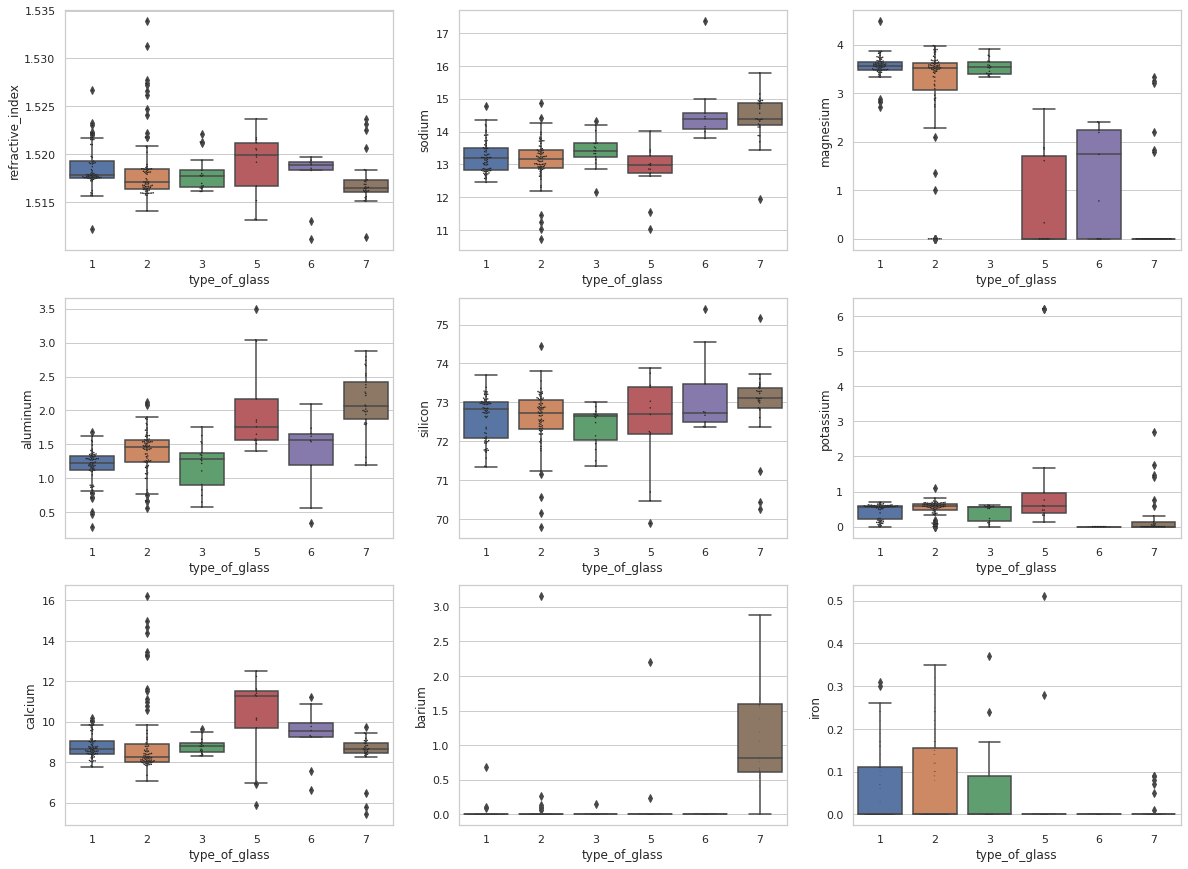

In [ ]:
sns.set(style="whitegrid", font_scale=1)
plt.subplots(figsize = (20,15))

plt.subplot(3,3,1)
ax = sns.boxplot(x="type_of_glass", y="refractive_index", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="refractive_index", data=dataframe, color=".15", size=1.5)

plt.subplot(3,3,2)
ax = sns.boxplot(x="type_of_glass", y="sodium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="sodium", data=dataframe, color=".15", size=1.5)

plt.subplot(3,3,3)
ax = sns.boxplot(x="type_of_glass", y="magnesium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="magnesium", data=dataframe, color=".15", size=1.5)

plt.subplot(3,3,4)
ax = sns.boxplot(x="type_of_glass", y="aluminum", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="aluminum", data=dataframe, color=".15", size=1.5)

plt.subplot(3,3,5)
ax = sns.boxplot(x="type_of_glass", y="silicon", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="silicon", data=dataframe, color=".15", size=1.5)

plt.subplot(3,3,6)
ax = sns.boxplot(x="type_of_glass", y="potassium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="potassium", data=dataframe, color=".15", size=1.5)

plt.subplot(3,3,7)
ax = sns.boxplot(x="type_of_glass", y="calcium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="calcium", data=dataframe, color=".15", size=1.5)

plt.subplot(3,3,8)
ax = sns.boxplot(x="type_of_glass", y="barium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="barium", data=dataframe, color=".15", size=0.55)

plt.subplot(3,3,9)
ax = sns.boxplot(x="type_of_glass", y="iron", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="iron", data=dataframe, color=".15", size=0.65)

plt.show()

Podemos ver que tipos de cristales podrían presentar Outliers, sin embargo, no vamos a eliminarlos ya que como no disponemos de muchos datos y además, no sabemos con certeza que lo sean, ya que no siguen una distribución normal.

> ## PREPARAR DATOS (**OJOOO**!! HAY QUE CREAR UNA CLASE CON ESTO)

In [ ]:
#dataframe = dataframe.drop_duplicates()

In [3]:
# Standarization
from sklearn.preprocessing import StandardScaler

#X = dataframe.iloc[:,:-1]
X = dataframe.iloc[:,1:-1]
std_scl = StandardScaler()
X_transformed = std_scl.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed)
#X_transformed_df.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron"]
X_transformed_df.columns = ["sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron"]

X_transformed_df.head(5)

,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [4]:
#X sin Standarization
#X_transformed_df = dataframe.iloc[:,:-1]

In [5]:
Y = dataframe.iloc[:,-1:]
Y.head(5)

,type_of_glass
0,1
1,1
2,1
3,1
4,1


>** CREAR LA CLASE



> # Train_test_split: 75%-Train / 25%-Test

> Tenemos un problema de clasificación, ya que nuestra target es una variable categórica con 6 tipos o clases. Empezamos con un árbol de decisiones como modelo.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed_df, Y)

In [ ]:
print(Y_train.value_counts())
print(Y_test.value_counts())

type_of_glass
2                59
1                55
7                16
3                14
5                 9
6                 6
dtype: int64
type_of_glass
2                17
1                14
7                13
5                 4
6                 3
3                 3
dtype: int64


># Modelo inicial: DecisionTreeClassifier

In [9]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [10]:
from  sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

In [11]:
print('Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(model.score(X_train, Y_train)))
print('Sobre el conjunto de test:          {:.2f}'.format(model.score(X_test, Y_test)))

print('Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(accuracy_score(Y_train, model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(accuracy_score(Y_test, model.predict(X_test))))

print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model.predict(X_test))))

print('F1 Score:')
print('Sobre el conjunto de entrenamiento:', (f1_score(Y_train,model.predict(X_train),average=None)))
print('Sobre el conjunto de test         :', (f1_score(Y_test,model.predict(X_test),average=None)))
print('F1 Score Micro:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model.predict(X_test),  average='micro')))

Score:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.70
Accuracy Score:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.70
Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.63
F1 Score:
Sobre el conjunto de entrenamiento: [1. 1. 1. 1. 1. 1.]
Sobre el conjunto de test         : [0.73684211 0.68965517 0.         0.92307692 0.66666667 0.75      ]
F1 Score Micro:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.70


Sin optimizar con los hiperparámetros el árbol parece que pueda estar sobreajustando.

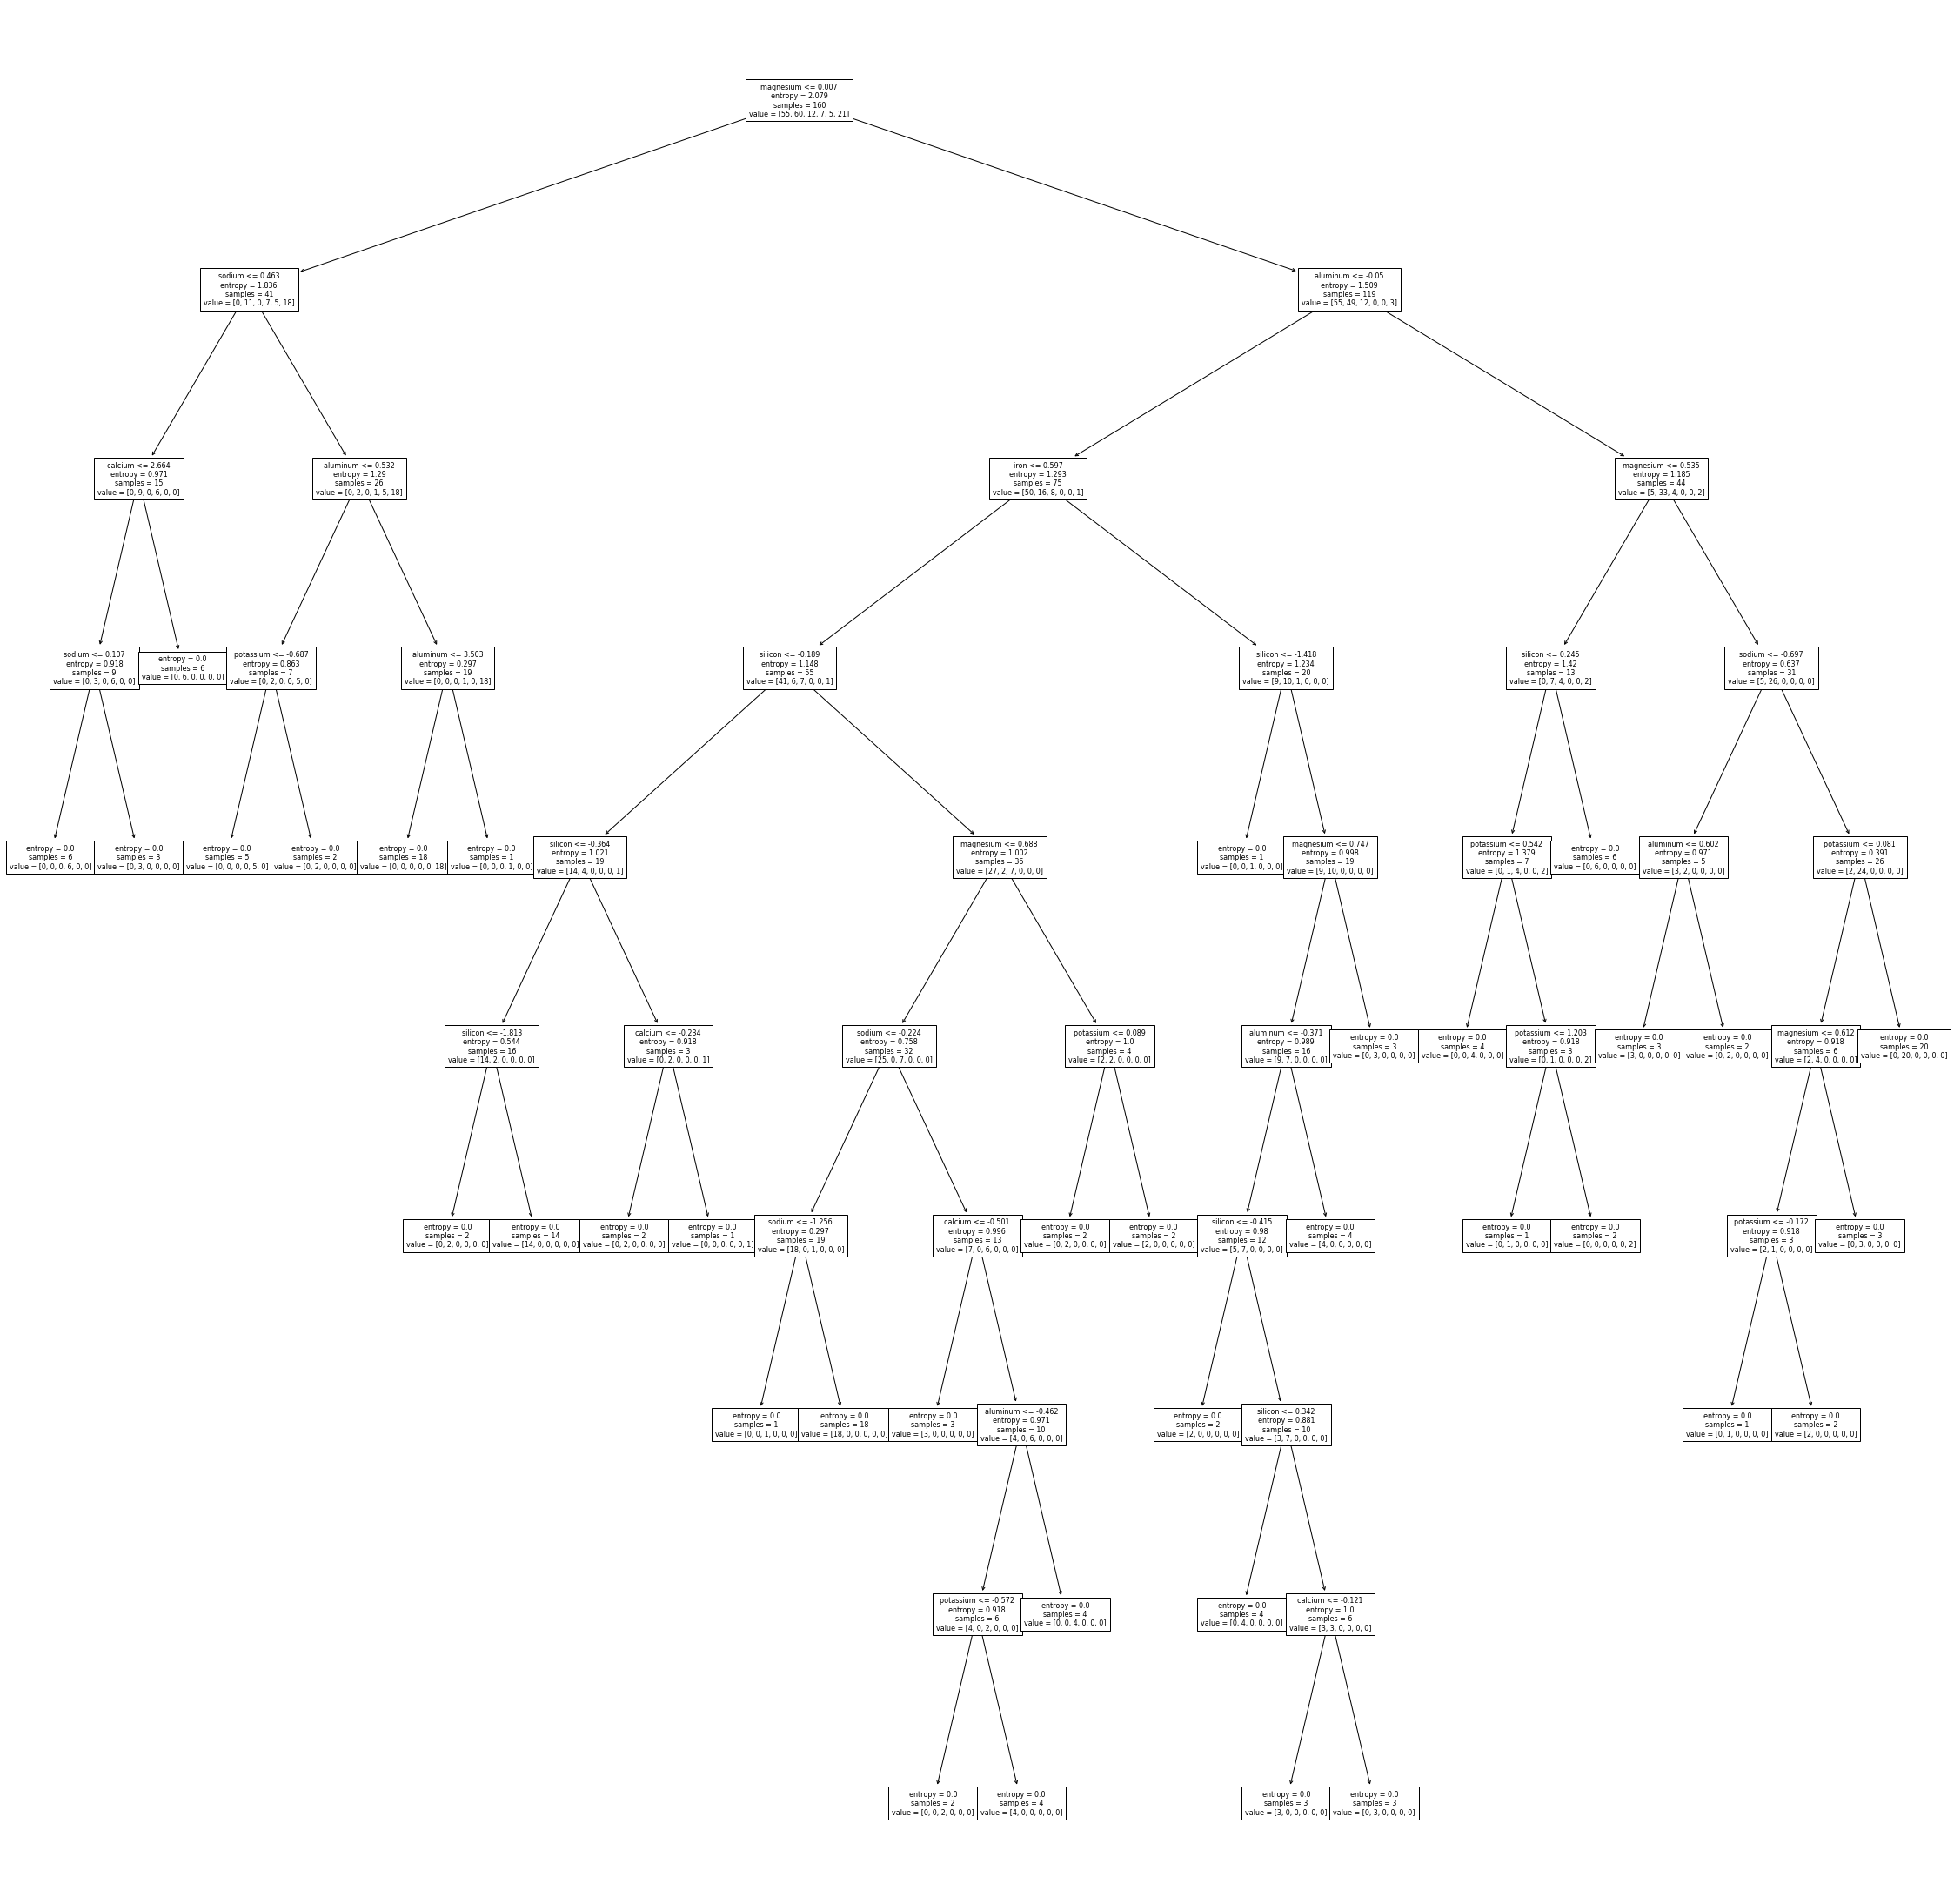

In [12]:
fig, ax = plt.subplots(figsize=(40, 40))
plot_tree(model, feature_names=X_transformed_df.columns, fontsize=8)
plt.show()

> # Ajustamos los hiperparámetros del modelo inicial. CrossValidation

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [5, 10, 15]}
dt2_model = DecisionTreeClassifier()
cv = GridSearchCV(dt2_model, param_grid, scoring="f1_micro", cv=10)

cv.fit(X_train, Y_train.values.ravel())

print("Los mejores hipermarámetros son %s con un score de %0.2f"
      % (cv.best_params_, cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


Los mejores hipermarámetros son {'max_depth': 5, 'min_samples_split': 15} con un score de 0.68


In [ ]:
cv.cv_results_

In [16]:
dt3_model = cv.best_estimator_
dt3_model.fit(X_train, Y_train.values.ravel())

DecisionTreeClassifier(max_depth=5, min_samples_split=15)

In [17]:
print('Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(dt3_model.score(X_train, Y_train)))
print('Sobre el conjunto de test:          {:.2f}'.format(dt3_model.score(X_test, Y_test)))

print('Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(accuracy_score(Y_train, dt3_model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(accuracy_score(Y_test, dt3_model.predict(X_test))))

print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, dt3_model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, dt3_model.predict(X_test))))

print('F1 Score:')
print('Sobre el conjunto de entrenamiento:', (f1_score(Y_train,dt3_model.predict(X_train),average=None)))
print('Sobre el conjunto de test         :', (f1_score(Y_test,dt3_model.predict(X_test),average=None)))
print('F1 Score Micro:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, dt3_model.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, dt3_model.predict(X_test),  average='micro')))

Score:
Sobre el conjunto de entrenamiento: 0.80
Sobre el conjunto de test:          0.57
Accuracy Score:
Sobre el conjunto de entrenamiento: 0.80
Sobre el conjunto de test:          0.57
Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 0.70
Sobre el conjunto de test:          0.48
F1 Score:
Sobre el conjunto de entrenamiento: [0.8125     0.81818182 0.42105263 0.75       0.57142857 0.95      ]
Sobre el conjunto de test         : [0.65       0.51851852 0.         0.76923077 0.         0.8       ]
F1 Score Micro:
Sobre el conjunto de entrenamiento: 0.80
Sobre el conjunto de test:          0.57


Parace que podriamos haber mejorado el problema de overfitting. A pesar de ello nuestro modelo no predice con buena precisión. Vamos a observar las curvas ROC:

In [23]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score
num2class= {1: '1', 2: '2', 3: '3', 5: '5', 6: '6', 7: '7'}

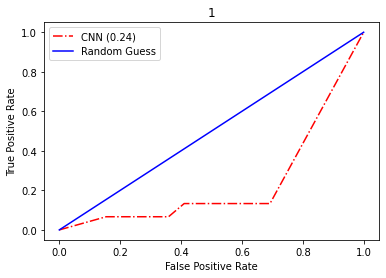

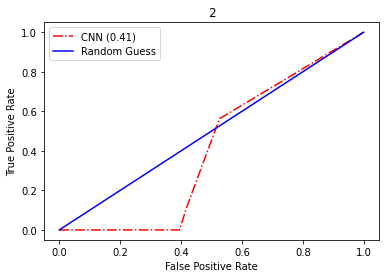

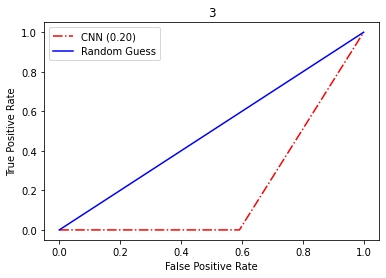

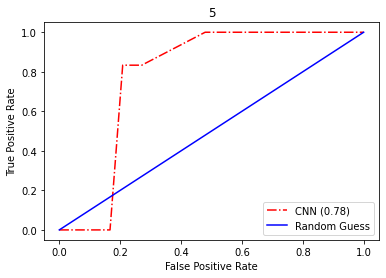

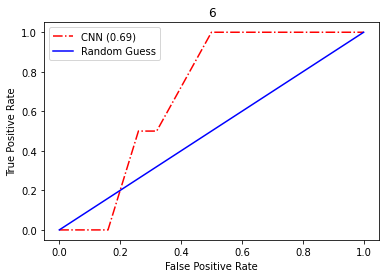

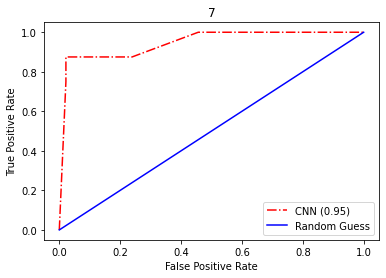

In [24]:
y_pred_proba_dt3_model = dt3_model.predict(X_test)

for clase in [1, 2, 3, 5, 6, 7]:
    nombre_clase = num2class[clase]
    fpr, tpr, thresholds = roc_curve(Y_test==clase, y_pred_proba_dt3_model)
    fig, ax1 = plt.subplots(1,1)
    ax1.plot(fpr, tpr, 'r-.', label = 'CNN (%2.2f)' % auc(fpr, tpr))
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
    ax1.set_title(nombre_clase)
    ax1.legend()
    plt.show()

> # Aplicamos Bagging al modelo tuneado **(este es el bueno de luis, que solo le sale bien a él)**

In [26]:
from sklearn.ensemble import BaggingClassifier

In [31]:
base_estimator = dt3_model
bag2_model = BaggingClassifier(base_estimator, n_estimators=5, max_samples=100, max_features=5)

param_grid = {'n_estimators': range(2, 11), 'max_samples': range(2, 101, 2)}
model = bag2_model
cv2 = GridSearchCV(model, param_grid, scoring="f1_micro", cv=10)

cv2.fit(X_train, Y_train.values.ravel())

print("Los mejores hipermarámetros son %s con un score de %0.2f"
      % (cv.best_params_, cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


Los mejores hipermarámetros son {'max_depth': 5, 'min_samples_split': 15} con un score de 0.68


In [32]:
bag3_model = cv2.best_estimator_
bag3_model.fit(X_train, Y_train.values.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        min_samples_split=15),
                  max_features=5, max_samples=92, n_estimators=8)

In [34]:
print('Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(bag3_model.score(X_train, Y_train)))
print('Sobre el conjunto de test:          {:.2f}'.format(bag3_model.score(X_test, Y_test)))

print('Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(accuracy_score(Y_train, bag3_model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(accuracy_score(Y_test, bag3_model.predict(X_test))))

print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, bag3_model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, bag3_model.predict(X_test))))

print('F1 Score:')
print('Sobre el conjunto de entrenamiento:', (f1_score(Y_train,bag3_model.predict(X_train),average=None)))
print('Sobre el conjunto de test         :', (f1_score(Y_test,bag3_model.predict(X_test),average=None)))
print('F1 Score Micro:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, bag3_model.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, bag3_model.predict(X_test),  average='micro')))

Score:
Sobre el conjunto de entrenamiento: 0.75
Sobre el conjunto de test:          0.70
Accuracy Score:
Sobre el conjunto de entrenamiento: 0.75
Sobre el conjunto de test:          0.70
Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 0.48
Sobre el conjunto de test:          0.54
F1 Score:
Sobre el conjunto de entrenamiento: [0.8        0.77272727 0.         0.         0.33333333 0.93023256]
Sobre el conjunto de test         : [0.8        0.75       0.         0.         0.66666667 0.875     ]
F1 Score Micro:
Sobre el conjunto de entrenamiento: 0.75
Sobre el conjunto de test:          0.70


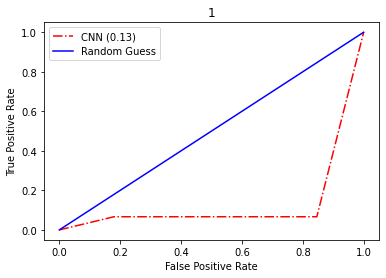

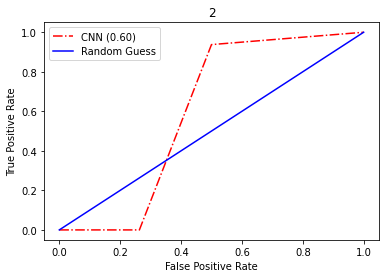

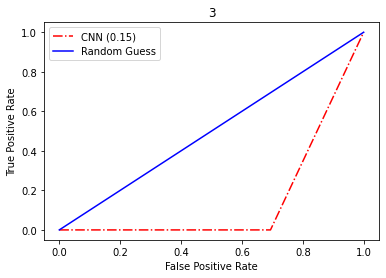

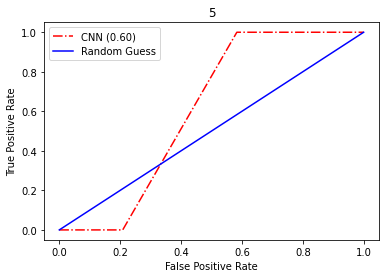

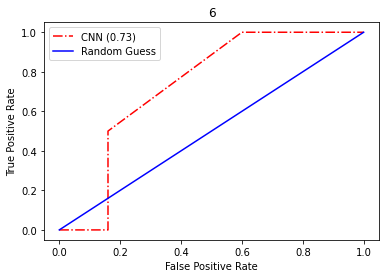

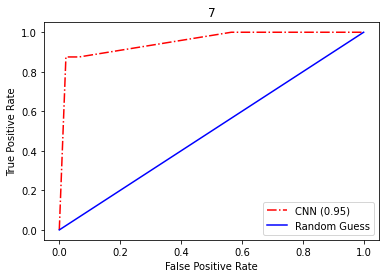

In [36]:
y_pred_proba_bag3 = bag3_model.predict(X_test)

for clase in [1, 2, 3, 5, 6, 7]:
    nombre_clase = num2class[clase]
    fpr, tpr, thresholds = roc_curve(Y_test==clase, y_pred_proba_bag3)
    fig, ax1 = plt.subplots(1,1)
    ax1.plot(fpr, tpr, 'r-.', label = 'CNN (%2.2f)' % auc(fpr, tpr))
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
    ax1.set_title(nombre_clase)
    ax1.legend()
    plt.show()

> # Random Forest Classifier - CrossValidation

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, Y_train.values.ravel())

RandomForestClassifier()

In [44]:
print('Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(model_RF.score(X_train, Y_train)))
print('Sobre el conjunto de test:          {:.2f}'.format(model_RF.score(X_test, Y_test)))

print('Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(accuracy_score(Y_train, model_RF.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(accuracy_score(Y_test, model_RF.predict(X_test))))

print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model_RF.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model_RF.predict(X_test))))

print('F1 Score:')
print('Sobre el conjunto de entrenamiento:', (f1_score(Y_train,model_RF.predict(X_train),average=None)))
print('Sobre el conjunto de test         :', (f1_score(Y_test,model_RF.predict(X_test),average=None)))
print('F1 Score Micro:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model_RF.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model_RF.predict(X_test),  average='micro')))

Score:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.74
Accuracy Score:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.74
Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.66
F1 Score:
Sobre el conjunto de entrenamiento: [1. 1. 1. 1. 1. 1.]
Sobre el conjunto de test         : [0.75675676 0.75       0.         0.8        0.85714286 0.875     ]
F1 Score Micro:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.74


Cross Validation

In [48]:
param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [5, 10, 15]}
rf_2 = RandomForestClassifier()
grid = GridSearchCV(rf_2, param_grid, scoring="f1_micro", cv=5)

grid.fit(X_train, Y_train.values.ravel())

print("Los mejores hipermarámetros son %s con un score de %0.2f"
      % (grid.best_params_, grid.best_score_))

Los mejores hipermarámetros son {'max_depth': 20, 'min_samples_split': 10} con un score de 0.72


In [49]:
model_RF2 = grid.best_estimator_
model_RF2.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(max_depth=20, min_samples_split=10)

In [50]:
print('Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(model_RF2.score(X_train, Y_train)))
print('Sobre el conjunto de test:          {:.2f}'.format(model_RF2.score(X_test, Y_test)))

print('Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(accuracy_score(Y_train, model_RF2.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(accuracy_score(Y_test, model_RF2.predict(X_test))))

print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model_RF2.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model_RF2.predict(X_test))))

print('F1 Score:')
print('Sobre el conjunto de entrenamiento:', (f1_score(Y_train,model_RF2.predict(X_train),average=None)))
print('Sobre el conjunto de test         :', (f1_score(Y_test,model_RF2.predict(X_test),average=None)))
print('F1 Score Micro:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model_RF2.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model_RF2.predict(X_test),  average='micro')))

Score:
Sobre el conjunto de entrenamiento: 0.90
Sobre el conjunto de test:          0.70
Accuracy Score:
Sobre el conjunto de entrenamiento: 0.90
Sobre el conjunto de test:          0.70
Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 0.79
Sobre el conjunto de test:          0.61
F1 Score:
Sobre el conjunto de entrenamiento: [0.89655172 0.944      0.5        0.83333333 0.88888889 0.95238095]
Sobre el conjunto de test         : [0.75675676 0.70588235 0.         0.5        0.85714286 0.875     ]
F1 Score Micro:
Sobre el conjunto de entrenamiento: 0.90
Sobre el conjunto de test:          0.70


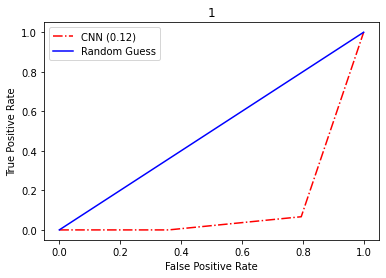

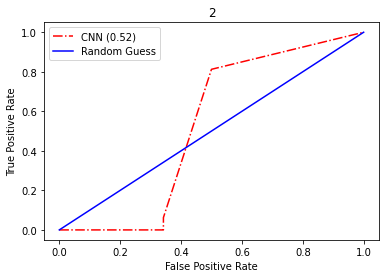

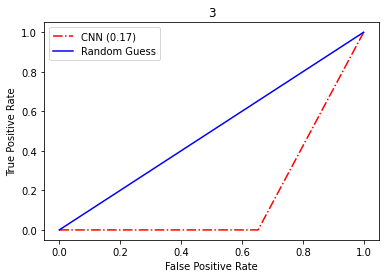

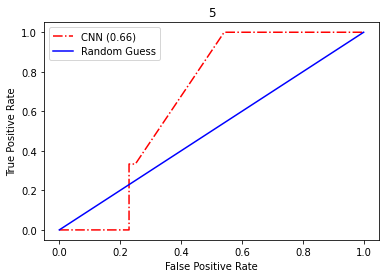

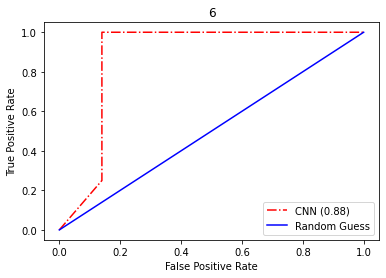

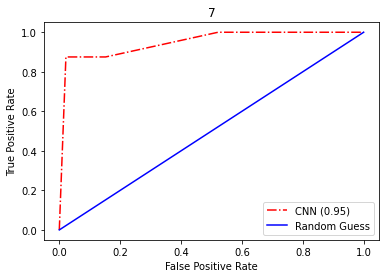

In [51]:
y_pred_probaRF2 = model_RF2.predict(X_test)

for clase in [1, 2, 3, 5, 6, 7]:
    nombre_clase = num2class[clase]
    fpr, tpr, thresholds = roc_curve(Y_test==clase, y_pred_probaRF2)
    fig, ax1 = plt.subplots(1,1)
    ax1.plot(fpr, tpr, 'r-.', label = 'CNN (%2.2f)' % auc(fpr, tpr))
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
    ax1.set_title(nombre_clase)
    ax1.legend()
    plt.show()

En test obtenemos resultados similares al modelo bagging pero con el random forest parece que hay mayor sobreajuste. 

> # Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [53]:
print('Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(model_RF2.score(X_train, Y_train)))
print('Sobre el conjunto de test:          {:.2f}'.format(model_RF2.score(X_test, Y_test)))

print('Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(accuracy_score(Y_train, model_RF2.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(accuracy_score(Y_test, model_RF2.predict(X_test))))

print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model_RF2.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model_RF2.predict(X_test))))

print('F1 Score:')
print('Sobre el conjunto de entrenamiento:', (f1_score(Y_train,model_RF2.predict(X_train),average=None)))
print('Sobre el conjunto de test         :', (f1_score(Y_test,model_RF2.predict(X_test),average=None)))
print('F1 Score Micro:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model_RF2.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model_RF2.predict(X_test),  average='micro')))

Score:
Sobre el conjunto de entrenamiento: 0.90
Sobre el conjunto de test:          0.70
Accuracy Score:
Sobre el conjunto de entrenamiento: 0.90
Sobre el conjunto de test:          0.70
Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 0.79
Sobre el conjunto de test:          0.61
F1 Score:
Sobre el conjunto de entrenamiento: [0.89655172 0.944      0.5        0.83333333 0.88888889 0.95238095]
Sobre el conjunto de test         : [0.75675676 0.70588235 0.         0.5        0.85714286 0.875     ]
F1 Score Micro:
Sobre el conjunto de entrenamiento: 0.90
Sobre el conjunto de test:          0.70


In [54]:
base_estimator = LogisticRegression(max_iter=10000)
bag_log = BaggingClassifier(base_estimator, n_estimators=5, max_samples=100, max_features=5)
#bag1_model.fit(X_train, Y_train.values.ravel())


param_grid = {'n_estimators': range(2, 11), 'max_samples': range(2, 101, 2)}
model = bag_log
cv2 = GridSearchCV(model, param_grid, scoring="f1_micro", cv=10)

In [55]:
bag_log.fit(X_train, Y_train.values.ravel())

BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000),
                  max_features=5, max_samples=100, n_estimators=5)

In [56]:
print('Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(bag_log.score(X_train, Y_train)))
print('Sobre el conjunto de test:          {:.2f}'.format(bag_log.score(X_test, Y_test)))

print('Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(accuracy_score(Y_train, bag_log.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(accuracy_score(Y_test, bag_log.predict(X_test))))

print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, bag_log.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, bag_log.predict(X_test))))

print('F1 Score:')
print('Sobre el conjunto de entrenamiento:', (f1_score(Y_train,bag_log.predict(X_train),average=None)))
print('Sobre el conjunto de test         :', (f1_score(Y_test,bag_log.predict(X_test),average=None)))
print('F1 Score Micro:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, bag_log.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, bag_log.predict(X_test),  average='micro')))

Score:
Sobre el conjunto de entrenamiento: 0.69
Sobre el conjunto de test:          0.48
Accuracy Score:
Sobre el conjunto de entrenamiento: 0.69
Sobre el conjunto de test:          0.48
Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 0.52
Sobre el conjunto de test:          0.37
F1 Score:
Sobre el conjunto de entrenamiento: [0.71544715 0.671875   0.         0.44444444 0.57142857 0.92682927]
Sobre el conjunto de test         : [0.48648649 0.47368421 0.         0.28571429 0.         0.82352941]
F1 Score Micro:
Sobre el conjunto de entrenamiento: 0.69
Sobre el conjunto de test:          0.48


# CONCLUSIONES

El mejor modelo ha sido el de bagging aplicado al DesicionTree con los mejores estimadores obtenidos en el CrossValidation. 

In [57]:
print('Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(bag3_model.score(X_train, Y_train)))
print('Sobre el conjunto de test:          {:.2f}'.format(bag3_model.score(X_test, Y_test)))

print('Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(accuracy_score(Y_train, bag3_model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(accuracy_score(Y_test, bag3_model.predict(X_test))))

print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, bag3_model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, bag3_model.predict(X_test))))

print('F1 Score:')
print('Sobre el conjunto de entrenamiento:', (f1_score(Y_train,bag3_model.predict(X_train),average=None)))
print('Sobre el conjunto de test         :', (f1_score(Y_test,bag3_model.predict(X_test),average=None)))
print('F1 Score Micro:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, bag3_model.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, bag3_model.predict(X_test),  average='micro')))

Score:
Sobre el conjunto de entrenamiento: 0.75
Sobre el conjunto de test:          0.70
Accuracy Score:
Sobre el conjunto de entrenamiento: 0.75
Sobre el conjunto de test:          0.70
Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 0.48
Sobre el conjunto de test:          0.54
F1 Score:
Sobre el conjunto de entrenamiento: [0.8        0.77272727 0.         0.         0.33333333 0.93023256]
Sobre el conjunto de test         : [0.8        0.75       0.         0.         0.66666667 0.875     ]
F1 Score Micro:
Sobre el conjunto de entrenamiento: 0.75
Sobre el conjunto de test:          0.70


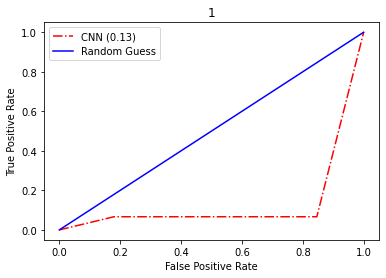

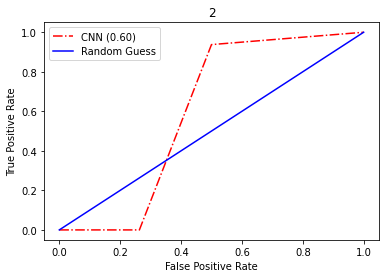

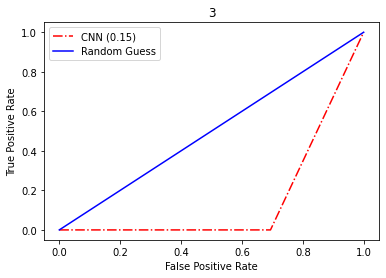

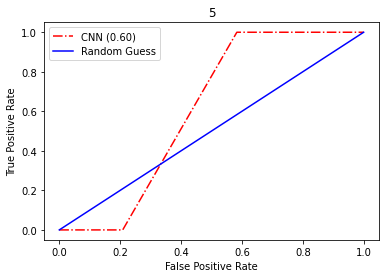

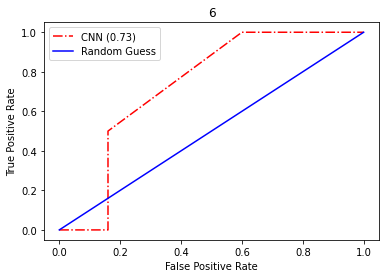

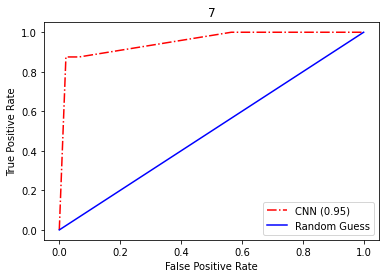

In [58]:
y_pred_proba_bag3 = bag3_model.predict(X_test)

for clase in [1, 2, 3, 5, 6, 7]:
    nombre_clase = num2class[clase]
    fpr, tpr, thresholds = roc_curve(Y_test==clase, y_pred_proba_bag3)
    fig, ax1 = plt.subplots(1,1)
    ax1.plot(fpr, tpr, 'r-.', label = 'CNN (%2.2f)' % auc(fpr, tpr))
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
    ax1.set_title(nombre_clase)
    ax1.legend()
    plt.show()